# wetterdienst - A basic notebook example

In [1]:
#!pip install wetterdienst

## Import modules necessary for general functioning

In [2]:
from pprint import pprint

from wetterdienst.provider.dwd.observation import (
    DwdObservationRequest,
    DwdObservationPeriod,
    DwdObservationResolution,
    DwdObservationParameter,
    DwdObservationDataset,
)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
%matplotlib inline

Which parameters are available?

All available parameters

In [4]:
pprint(DwdObservationRequest.discover())

{'annual': {'cloud_cover_total': {'origin': '1/8', 'si': 'pct'},
            'count_weather_type_dew': {'origin': '-', 'si': '-'},
            'count_weather_type_fog': {'origin': '-', 'si': '-'},
            'count_weather_type_glaze': {'origin': '-', 'si': '-'},
            'count_weather_type_hail': {'origin': '-', 'si': '-'},
            'count_weather_type_sleet': {'origin': '-', 'si': '-'},
            'count_weather_type_storm_stormier_wind': {'origin': '-',
                                                       'si': '-'},
            'count_weather_type_storm_strong_wind': {'origin': '-', 'si': '-'},
            'count_weather_type_thunder': {'origin': '-', 'si': '-'},
            'precipitation_height': {'origin': 'mm', 'si': 'kg / m ** 2'},
            'precipitation_height_max': {'origin': 'mm', 'si': 'kg / m ** 2'},
            'snow_depth': {'origin': 'cm', 'si': 'm'},
            'snow_depth_new': {'origin': 'cm', 'si': 'm'},
            'sunshine_duration': {'origin': '

Selection of daily data

In [5]:
pprint(DwdObservationRequest.discover(resolution=DwdObservationResolution.DAILY))

{'daily': {'cloud_cover_total': {'origin': '1/8', 'si': 'pct'},
           'count_weather_type_dew': {'origin': '-', 'si': '-'},
           'count_weather_type_fog': {'origin': '-', 'si': '-'},
           'count_weather_type_glaze': {'origin': '-', 'si': '-'},
           'count_weather_type_hail': {'origin': '-', 'si': '-'},
           'count_weather_type_ripe': {'origin': '-', 'si': '-'},
           'count_weather_type_sleet': {'origin': '-', 'si': '-'},
           'count_weather_type_storm_stormier_wind': {'origin': '-', 'si': '-'},
           'count_weather_type_storm_strong_wind': {'origin': '-', 'si': '-'},
           'count_weather_type_thunder': {'origin': '-', 'si': '-'},
           'humidity': {'origin': 'pct', 'si': 'pct'},
           'precipitation_form': {'origin': '-', 'si': '-'},
           'precipitation_height': {'origin': 'mm', 'si': 'kg / m ** 2'},
           'pressure_air_site': {'origin': 'hPa', 'si': 'Pa'},
           'pressure_vapor': {'origin': 'hPa', 'si': 'Pa'}

## List of historical daily precipitation stations of DWD (Germany)

In [6]:
request = DwdObservationRequest(
    parameter=DwdObservationDataset.PRECIPITATION_MORE,
    resolution=DwdObservationResolution.DAILY,
    period=DwdObservationPeriod.HISTORICAL,
).all()
request.df.head()

,station_id,from_date,to_date,height,latitude,longitude,name,state
0,00001,1912-01-01 00:00:00+00:00,1986-06-30 00:00:00+00:00,478.0,47.8413,8.8493,Aach,Baden-Württemberg
1,00002,1951-01-01 00:00:00+00:00,2006-12-31 00:00:00+00:00,138.0,50.8066,6.0996,Aachen (Kläranlage),Nordrhein-Westfalen
2,00003,1891-01-01 00:00:00+00:00,2011-03-31 00:00:00+00:00,202.0,50.7827,6.0941,Aachen,Nordrhein-Westfalen
3,00004,1951-01-01 00:00:00+00:00,1979-10-31 00:00:00+00:00,243.0,50.7683,6.1207,Aachen-Brand,Nordrhein-Westfalen
4,00006,1982-11-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,455.0,48.8361,10.0598,Aalen-Unterrombach,Baden-Württemberg


Number of stations with available data

In [7]:
request.df.shape

(5651, 8)

## Map of historical daily precipitation stations of DWD (Germany)

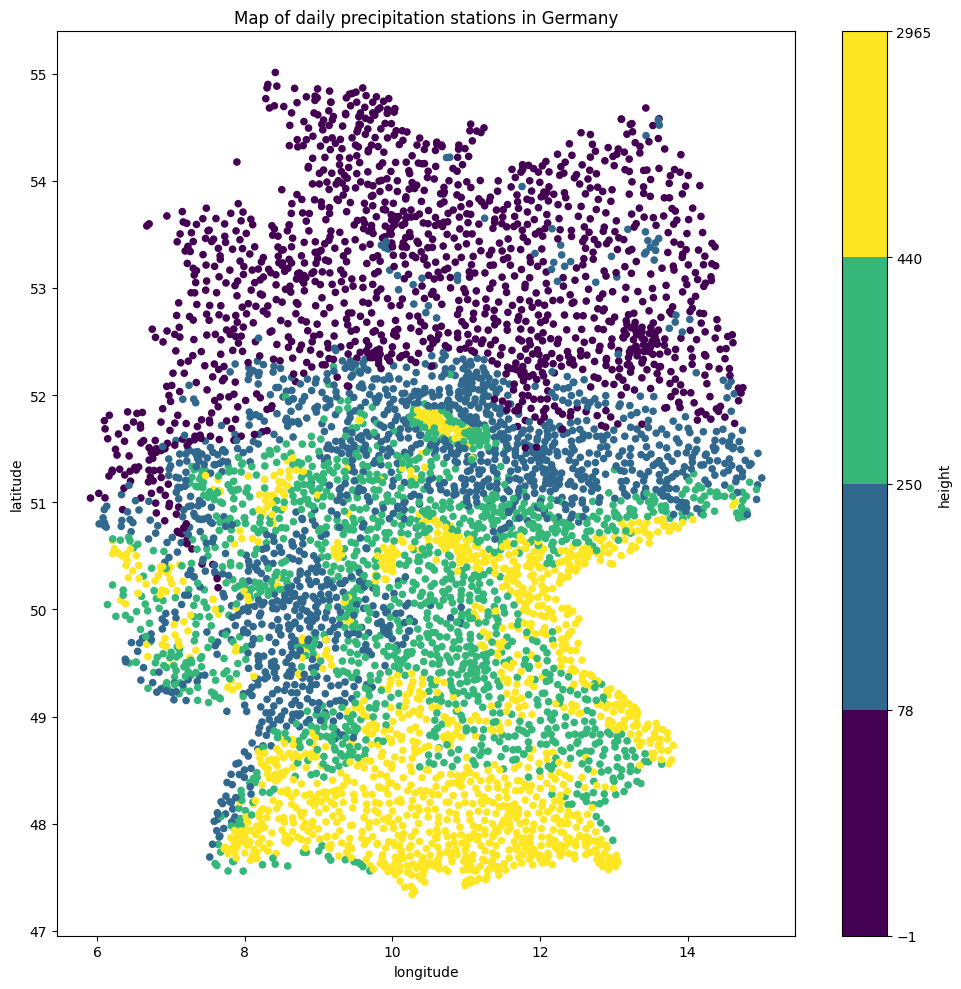

In [8]:
cmap = cm.get_cmap("viridis")
bounds = request.df.height.quantile([0, 0.25, 0.5, 0.75, 1]).values
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots(figsize=(10, 10), tight_layout=True)
plot = request.df.plot.scatter(x="longitude", y="latitude", c="height", cmap=cmap, norm=norm, ax=ax)
title = "Map of daily precipitation stations in Germany"
plot.set_title(title)
plt.show()

## Get data for daily precipitation station - Dresden Klotzsche (1048)

In [9]:
values = (
    DwdObservationRequest(
        parameter=DwdObservationDataset.PRECIPITATION_MORE,
        resolution=DwdObservationResolution.DAILY,
        period=DwdObservationPeriod.HISTORICAL,
    )
    .filter_by_station_id(station_id=[1048])
    .values.all()
    .df
)
values.dropna().head()

,station_id,dataset,parameter,date,value,quality
0,01048,precipitation_more,precipitation_height,1926-04-25 00:00:00+00:00,0.0,1.0
1,01048,precipitation_more,precipitation_height,1926-04-26 00:00:00+00:00,0.0,1.0
2,01048,precipitation_more,precipitation_height,1926-04-27 00:00:00+00:00,0.0,1.0
3,01048,precipitation_more,precipitation_height,1926-04-28 00:00:00+00:00,0.0,1.0
4,01048,precipitation_more,precipitation_height,1926-04-29 00:00:00+00:00,0.0,1.0


## Get data for daily precipitation and temperature (tmin, tmean, tmax) for station - Dresden Klotzsche (1048)

In [10]:
parameters = [
    DwdObservationParameter.DAILY.TEMPERATURE_AIR_MEAN_200,
    DwdObservationParameter.DAILY.TEMPERATURE_AIR_MAX_200,
    DwdObservationParameter.DAILY.TEMPERATURE_AIR_MIN_200,
    DwdObservationParameter.DAILY.PRECIPITATION_HEIGHT,
]
values = (
    DwdObservationRequest(
        parameter=parameters, resolution=DwdObservationResolution.DAILY, period=DwdObservationPeriod.HISTORICAL
    )
    .filter_by_station_id(station_id=(1048,))
    .values.all()
)
values.df.dropna(axis=0).head()

,station_id,dataset,parameter,date,value,quality
0,01048,climate_summary,temperature_air_mean_200,1934-01-01 00:00:00+00:00,273.65,1.0
1,01048,climate_summary,temperature_air_mean_200,1934-01-02 00:00:00+00:00,273.05,1.0
2,01048,climate_summary,temperature_air_mean_200,1934-01-03 00:00:00+00:00,272.45,1.0
3,01048,climate_summary,temperature_air_mean_200,1934-01-04 00:00:00+00:00,271.55,1.0
4,01048,climate_summary,temperature_air_mean_200,1934-01-05 00:00:00+00:00,274.05,1.0


## Aggregate to annual values

In [11]:
def _agg_custom(group_series):
    if group_series.name == "precipitation_height":
        return group_series.dropna().resample("1Y").sum(min_count=360)
    else:
        return group_series.dropna().resample("1Y").mean()


values_annual = values.df.set_index("date").groupby(["parameter"]).value.apply(_agg_custom).reset_index()
values_annual

,parameter,date,value
0,precipitation_height,1934-12-31 00:00:00+00:00,675.600000
1,precipitation_height,1935-12-31 00:00:00+00:00,643.100000
2,precipitation_height,1936-12-31 00:00:00+00:00,555.200000
3,precipitation_height,1937-12-31 00:00:00+00:00,793.700000
4,precipitation_height,1938-12-31 00:00:00+00:00,621.200000
...,...,...,...
347,temperature_air_min_200,2017-12-31 00:00:00+00:00,279.413014
348,temperature_air_min_200,2018-12-31 00:00:00+00:00,279.904247
349,temperature_air_min_200,2019-12-31 00:00:00+00:00,279.958493
350,temperature_air_min_200,2020-12-31 00:00:00+00:00,279.723497


## Create some plots for the data

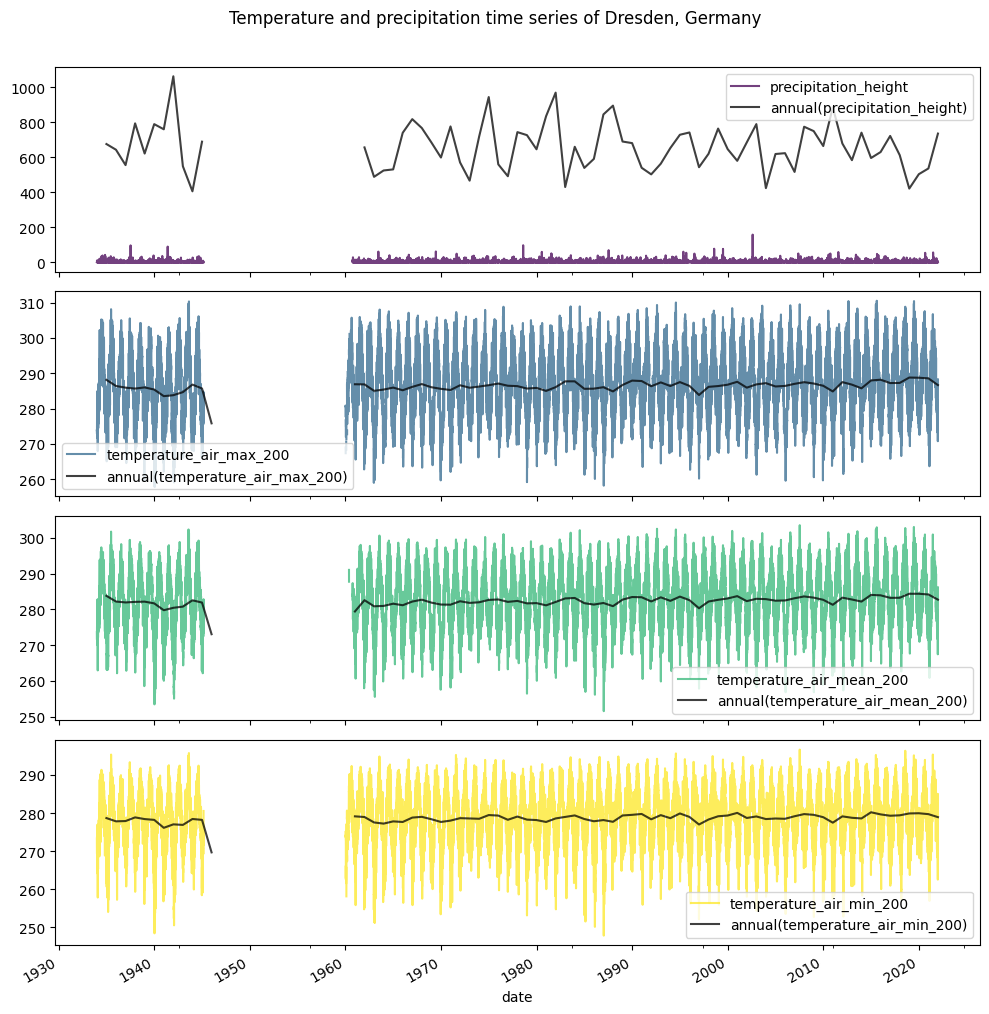

In [12]:
cmap = plt.get_cmap("viridis", 4)
colors = cmap.colors
fig, axes = plt.subplots(nrows=len(parameters), tight_layout=True, sharex=True, figsize=(10, 10))  #
for (parameter, daily), (_, annual), ax, color in zip(
    values.df.groupby("parameter"), values_annual.groupby("parameter"), axes, colors
):
    daily.plot(x="date", y="value", label=parameter, alpha=0.75, ax=ax, c=color)
    annual.plot(x="date", y="value", kind="line", label=f"annual({parameter})", alpha=0.75, ax=ax, c="black")
plt.suptitle("Temperature and precipitation time series of Dresden, Germany", y=1.01)
plt.show()

## Find a station

In [13]:
request = DwdObservationRequest(
    parameter=DwdObservationParameter.DAILY.CLIMATE_SUMMARY.TEMPERATURE_AIR_MEAN_200,
    resolution=DwdObservationResolution.DAILY,
    period=DwdObservationPeriod.HISTORICAL,
    start_date="1930-01-01",
    end_date="1970-01-01",
)

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>]


In [14]:
request.filter_by_rank((51.05089, 13.73832), 5).df

,station_id,from_date,to_date,height,latitude,longitude,name,state,distance
0,01047,1828-01-01 00:00:00+00:00,1915-12-31 00:00:00+00:00,112.0,51.0557,13.7274,Dresden (Mitte),Sachsen,0.932013
1,01051,1936-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,119.0,51.0249,13.7751,Dresden-Strehlen,Sachsen,3.868499
2,01050,1949-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,112.0,51.0221,13.8470,Dresden-Hosterwitz,Sachsen,8.245925
3,01048,1934-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,228.0,51.1278,13.7543,Dresden-Klotzsche,Sachsen,8.624522
4,05282,1917-01-01 00:00:00+00:00,1974-06-30 00:00:00+00:00,246.0,51.1197,13.6744,Wahnsdorf bei Dresden,Sachsen,8.858692


In [15]:
request.filter_by_distance((51.05089, 13.73832), 20).df

,station_id,from_date,to_date,height,latitude,longitude,name,state,distance
0,01047,1828-01-01 00:00:00+00:00,1915-12-31 00:00:00+00:00,112.0,51.0557,13.7274,Dresden (Mitte),Sachsen,0.932013
1,01051,1936-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,119.0,51.0249,13.7751,Dresden-Strehlen,Sachsen,3.868499
2,01050,1949-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,112.0,51.0221,13.8470,Dresden-Hosterwitz,Sachsen,8.245925
3,01048,1934-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,228.0,51.1278,13.7543,Dresden-Klotzsche,Sachsen,8.624522
4,05282,1917-01-01 00:00:00+00:00,1974-06-30 00:00:00+00:00,246.0,51.1197,13.6744,Wahnsdorf bei Dresden,Sachsen,8.858692
5,00991,1954-09-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,359.0,50.9116,13.7087,Dippoldiswalde-Reinberg,Sachsen,15.626528


In [16]:
request.filter_by_station_id("1048").df

,station_id,from_date,to_date,height,latitude,longitude,name,state
209,01048,1934-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,228.0,51.1278,13.7543,Dresden-Klotzsche,Sachsen


In [17]:
request.filter_by_name("Dresden Klo", threshold=70).df

,station_id,from_date,to_date,height,latitude,longitude,name,state
0,01048,1934-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,228.0,51.1278,13.7543,Dresden-Klotzsche,Sachsen


In [18]:
request.filter_by_sql("SELECT * FROM df WHERE name LIKE 'Dresden%' AND ABS(height - 200) < 30").df

,station_id,from_date,to_date,height,latitude,longitude,name,state
0,01048,1934-01-01 01:00:00+01:00,2022-12-20 01:00:00+01:00,228.0,51.1278,13.7543,Dresden-Klotzsche,Sachsen


In [19]:
request.filter_by_bbox(left=13.74, bottom=51.126, right=13.755, top=51.13).df

,station_id,from_date,to_date,height,latitude,longitude,name,state
0,01048,1934-01-01 00:00:00+00:00,2022-12-20 00:00:00+00:00,228.0,51.1278,13.7543,Dresden-Klotzsche,Sachsen


## Summarize values
Fill up values from nearby stations

In [20]:
request.summarize((51.05089, 13.73832)).df

,date,parameter,value,distance,station_id
0,1930-01-01 00:00:00+00:00,temperature_air_mean_200,275.75,8.858692,05282
1,1930-01-02 00:00:00+00:00,temperature_air_mean_200,278.25,8.858692,05282
2,1930-01-03 00:00:00+00:00,temperature_air_mean_200,279.35,8.858692,05282
3,1930-01-04 00:00:00+00:00,temperature_air_mean_200,279.25,8.858692,05282
4,1930-01-05 00:00:00+00:00,temperature_air_mean_200,273.65,8.858692,05282
...,...,...,...,...,...
14606,1969-12-28 00:00:00+00:00,temperature_air_mean_200,262.95,3.868499,01051
14607,1969-12-29 00:00:00+00:00,temperature_air_mean_200,262.95,3.868499,01051
14608,1969-12-30 00:00:00+00:00,temperature_air_mean_200,267.55,3.868499,01051
14609,1969-12-31 00:00:00+00:00,temperature_air_mean_200,263.35,3.868499,01051


## Interpolate values

In [21]:
request.interpolate((51.05089, 13.73832)).df

,date,parameter,value,distance_mean,station_ids
0,1930-01-01 00:00:00+00:00,temperature_air_mean_200,NaN,NaN,[]
1,1930-01-02 00:00:00+00:00,temperature_air_mean_200,NaN,NaN,[]
2,1930-01-03 00:00:00+00:00,temperature_air_mean_200,NaN,NaN,[]
3,1930-01-04 00:00:00+00:00,temperature_air_mean_200,NaN,NaN,[]
4,1930-01-05 00:00:00+00:00,temperature_air_mean_200,NaN,NaN,[]
...,...,...,...,...,...
14606,1969-12-28 00:00:00+00:00,temperature_air_mean_200,263.095228,9.091368,"[01051, 01050, 01048, 00991]"
14607,1969-12-29 00:00:00+00:00,temperature_air_mean_200,262.676706,9.091368,"[01051, 01050, 01048, 00991]"
14608,1969-12-30 00:00:00+00:00,temperature_air_mean_200,267.365337,9.091368,"[01051, 01050, 01048, 00991]"
14609,1969-12-31 00:00:00+00:00,temperature_air_mean_200,263.281445,9.091368,"[01051, 01050, 01048, 00991]"
